<a href="https://colab.research.google.com/github/Hasinigammune/Breakfast_cereal_segmentation_with_K_means/blob/main/Breakfast_cereal_segmentation_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler

#clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import requests

# seaborn library
import seaborn as sns

#plotting libraries
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from pandas.plotting import scatter_matrix
import plotly.express as px
import plotly.figure_factory as ff

import warnings
from tabulate import tabulate

In [43]:
# Import data from GitHub using the url bellow
data_path='https://raw.githubusercontent.com/Hasinigammune/Breakfast_cereal_segmentation_with_K_means/main/cereal.csv'
df=pd.read_csv(data_path)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [44]:
from pandas.core.describe import DataFrameDescriber
#Removing null values
df = df.dropna()
df.isnull().sum()



name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [45]:
cereal=df.iloc[:, 0:11]
cereal.describe()
#cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000


Text(0.5, 0.98, 'Histograms of Nutritional factors in cereal Data')

<Figure size 1000x1000 with 0 Axes>

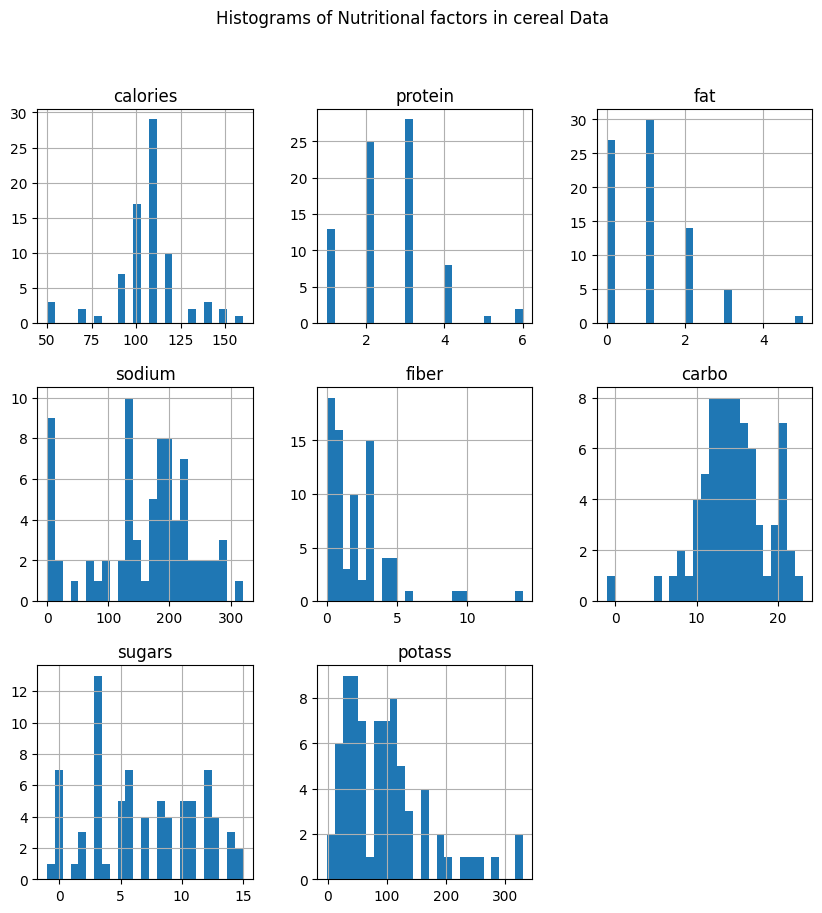

In [46]:
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10, 10))

# Histograms
cereal.hist( bins=25,figsize=(10,10))
plt.suptitle("Histograms of Nutritional factors in cereal Data", fontsize=12)

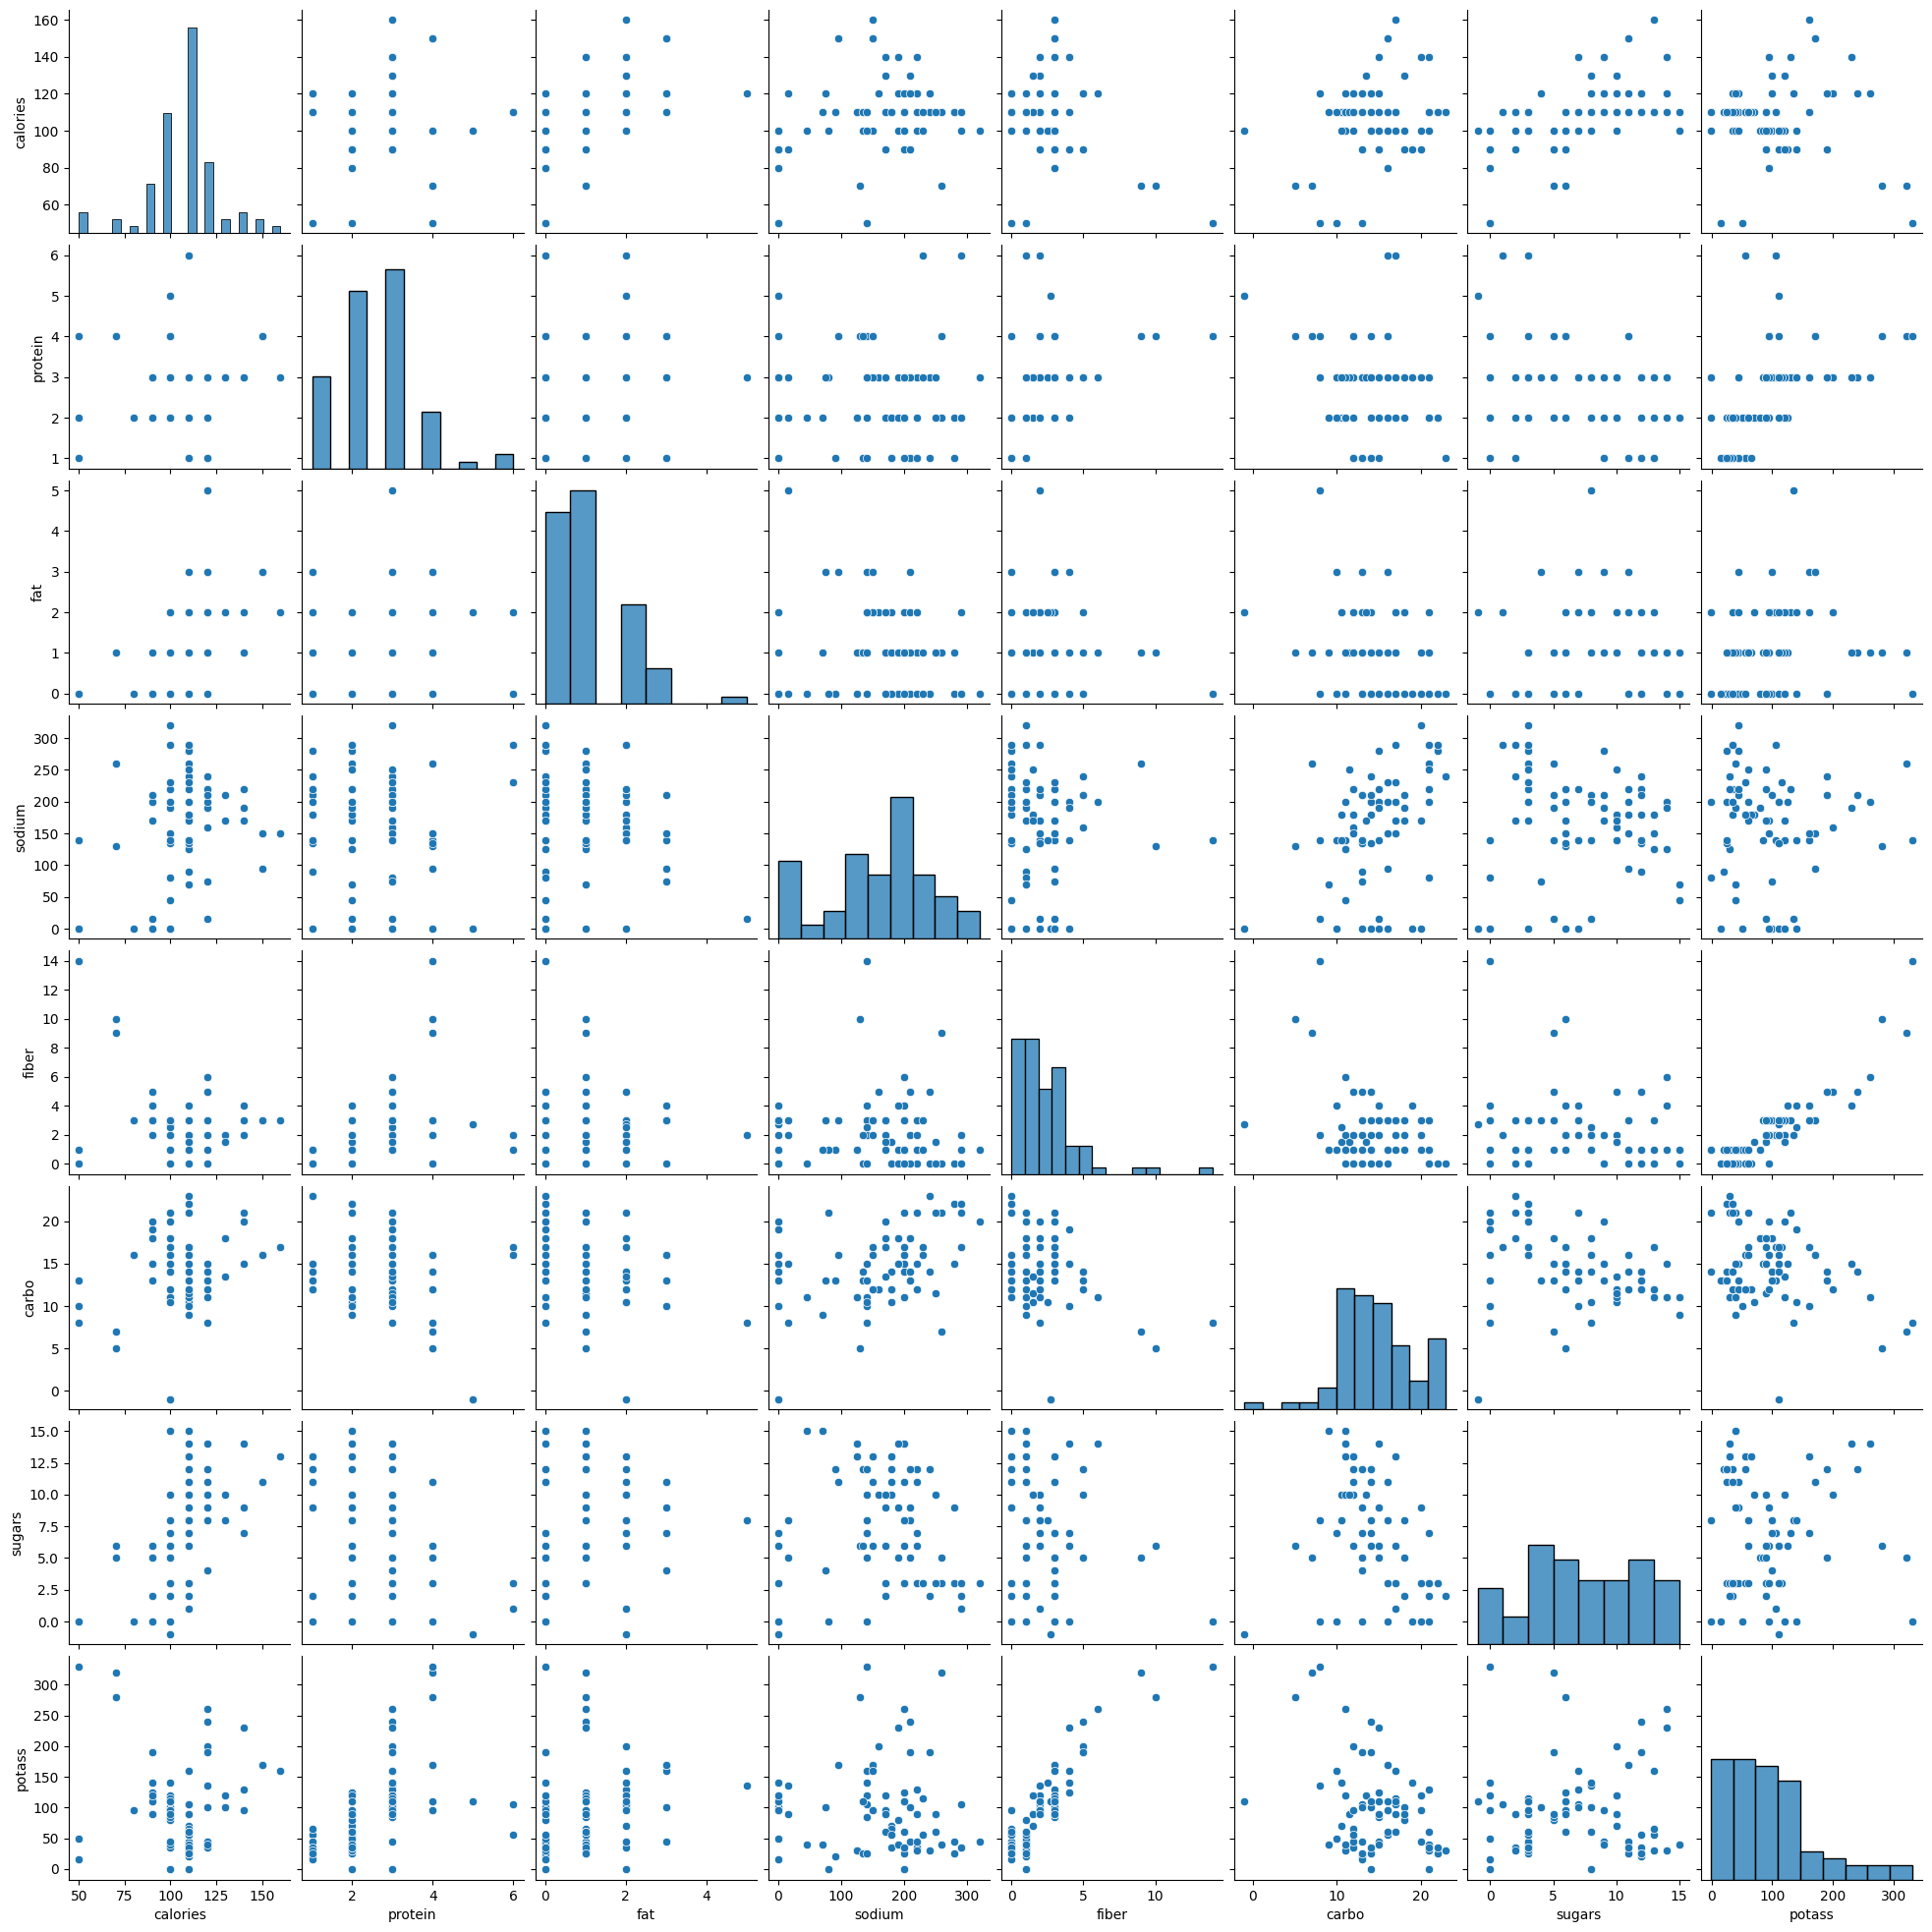

In [47]:
# Correlation analysis
sns.pairplot(cereal)

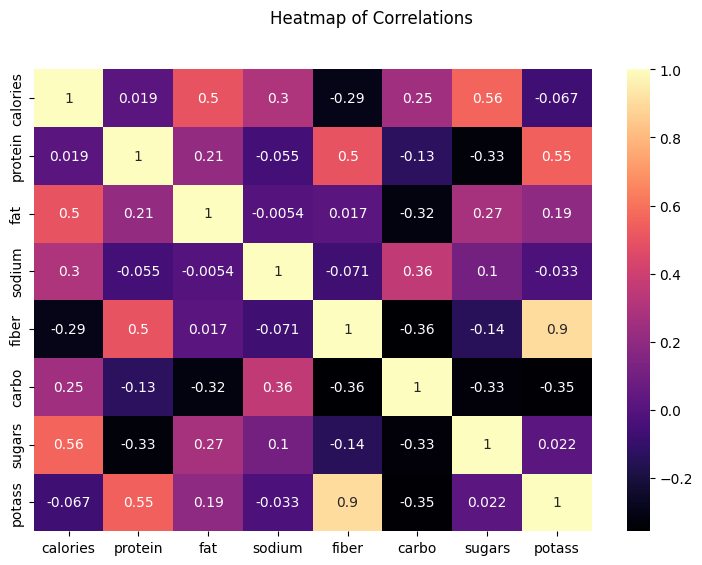

In [48]:
fig , ax = plt.subplots(figsize = (9,6))
sns.heatmap(cereal.corr() , annot = True , ax = ax, cmap='magma')
plt.suptitle("Heatmap of Correlations", fontsize=12)
plt.show()

- As the correlation between most of the variables are very low, therefore, rather than going with the correlation-based distance, we can use metric-based distance for clustering.
- Also I would suggest standardizing the variables as they are in different scales and some have very high ranges.

**Hierarchical Clustering with Complete linkage**

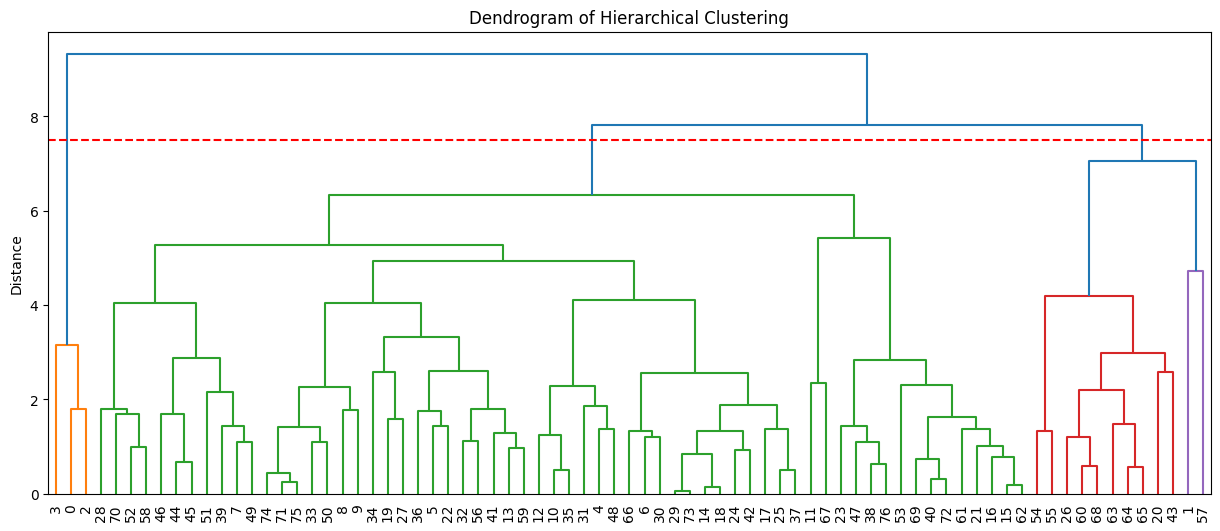

[1 3 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 3 2 3 2 2 3 2 2 3 3 3 2 2 3 2 2 2 2 2
 2 2 2]


In [61]:
cereal_sub=cereal.drop(["name","mfr","type"],axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cereal_sc = scaler.fit_transform(cereal_sub)

# Perform hierarchical clustering
cereal_complete = linkage(cereal_sc, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 6))
dendrogram(cereal_complete, labels=cereal_sub.index, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('')
plt.ylabel('Distance')
plt.title('Dendrogram of Hierarchical Clustering')
plt.axhline(y=7.5, color='red', linestyle='--')
plt.show()

# Cut the tree at a specific height to obtain clusters
clusters = fcluster(cereal_complete, t=7.5, criterion='distance')
print(clusters)

- Clearly there are 4 clusters. But the classification seems to be difficult due to the 3 observations in the leftmost region and the 2 observations in the rightmost region of the dendrogram. If we consider those 2 observations in the rightmost region as the same cluster as the red cluster, then there seems to be 3 clusters.

In [50]:
# Convert the 'clusters' array to 'clust' variable
clust = clusters

# Get the number of observations within each cluster
table_counts = pd.Series(clust).value_counts().sort_index()

# Create a DataFrame with cluster means for each variable
c1 = cereal_sub[clust == 1].mean()
c2 = cereal_sub[clust == 2].mean()
c3 = cereal_sub[clust == 3].mean()
#c4 = customer_sub[clust == 4].mean()
d = pd.DataFrame([c1, c2, c3], index=["Cluster 1", "Cluster 2", "Cluster 3"])

# Convert 'd' DataFrame to a formatted string table
table_d = d.to_string()

# Display the tables
print("Number of observations within each cluster (Hierarchical Clustering):")
print(table_counts)
print("\nCluster means of the variables (Hierarchical Clustering):")
#print(table_d)
print(tabulate(d, headers=d.keys(), tablefmt='grid'))

Number of observations within each cluster (Hierarchical Clustering):
1     3
2    62
3    12
dtype: int64

Cluster means of the variables (Hierarchical Clustering):
+-----------+------------+-----------+----------+-----------+----------+----------+----------+----------+
|           |   calories |   protein |      fat |    sodium |    fiber |    carbo |   sugars |   potass |
+===========+============+===========+==========+===========+==========+==========+==========+==========+
| Cluster 1 |    63.3333 |   4       | 0.666667 | 176.667   | 11       |  6.66667 |  3.66667 | 310      |
+-----------+------------+-----------+----------+-----------+----------+----------+----------+----------+
| Cluster 2 |   112.581  |   2.43548 | 1.09677  | 187.984   |  1.74194 | 15.129   |  7.96774 |  87.2419 |
+-----------+------------+-----------+----------+-----------+----------+----------+----------+----------+
| Cluster 3 |    88.3333 |   2.75    | 0.666667 |   9.16667 |  2.05833 | 13.8333  |  2.33333

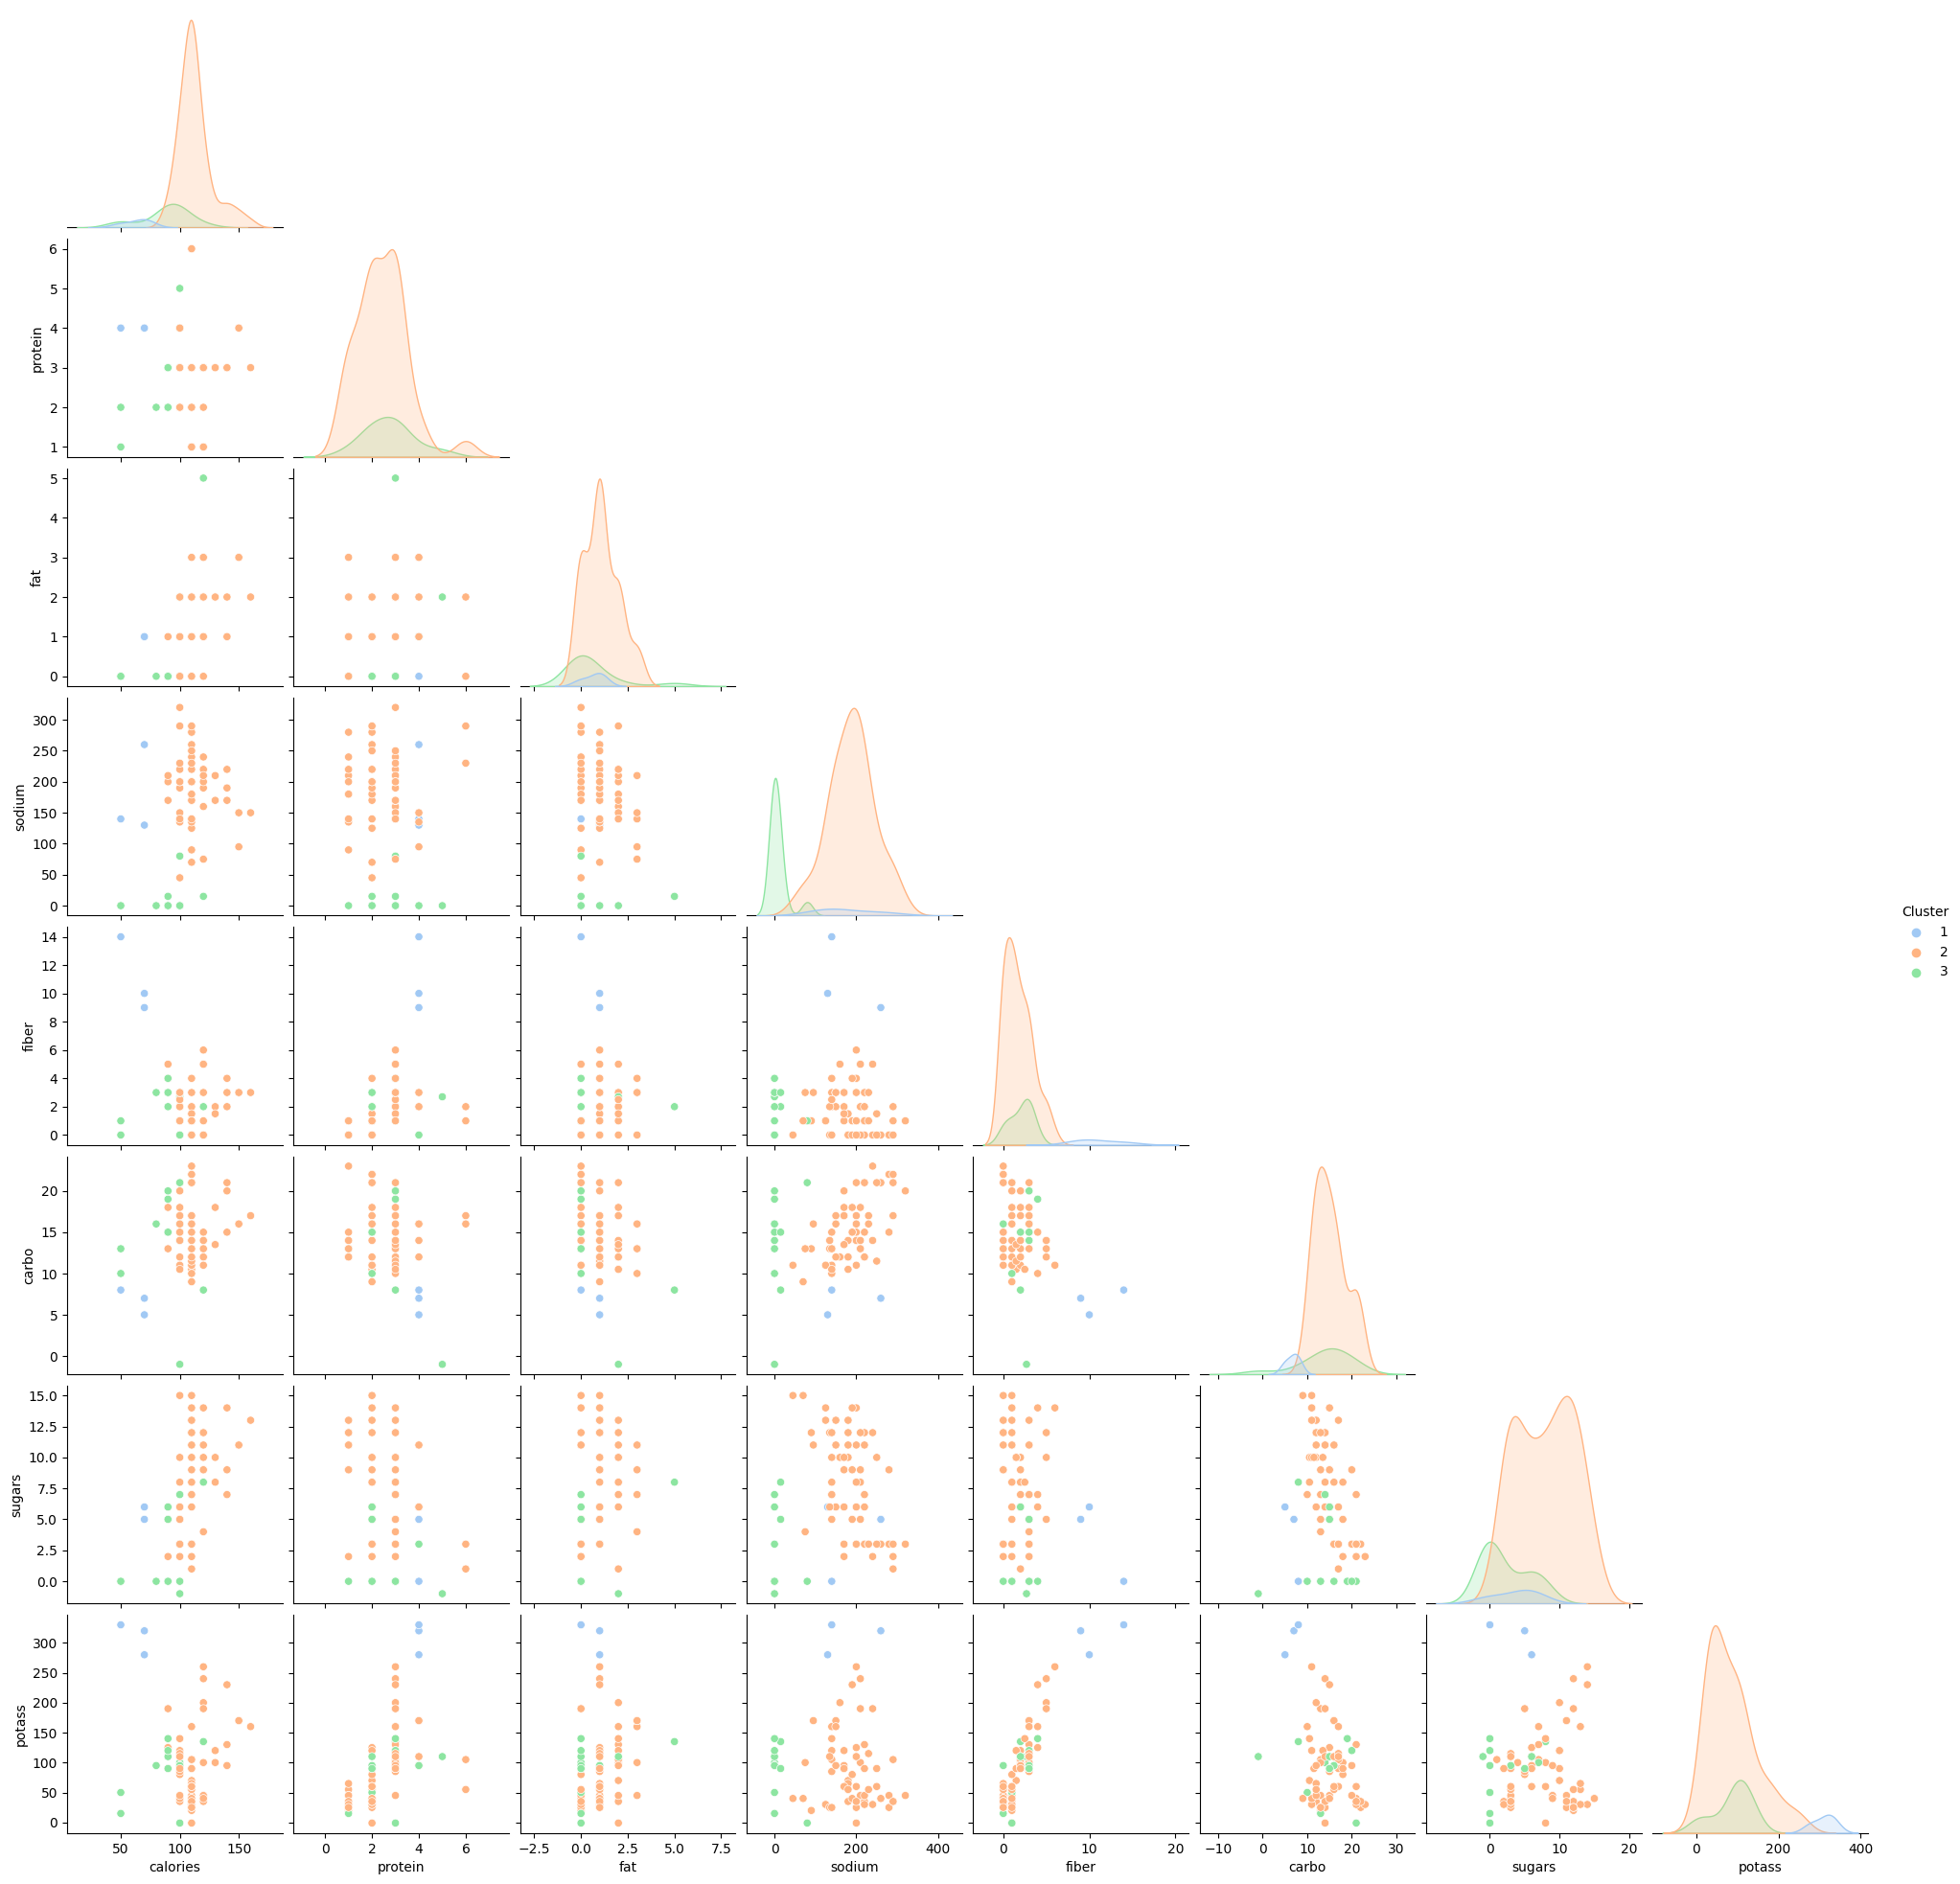

In [51]:
cereal_clust=pd.concat([cereal, pd.Series(clust, name='Cluster')], axis=1)
#sns.set_palette("Spectral")
# Create the pair plot
sns.pairplot(cereal_clust, hue='Cluster', corner=True, palette="pastel")

# Show the plot
plt.show()



In [52]:
# Cut the tree at a specific height to obtain clusters
clusters = fcluster(cereal_complete, t=6.9, criterion='distance')
print(clusters)
clust = clusters

# Get the number of observations within each cluster
table_counts = pd.Series(clust).value_counts().sort_index()

# Create a DataFrame with cluster means for each variable
c1 = cereal_sub[clust == 1].mean()
c2 = cereal_sub[clust == 2].mean()
c3 = cereal_sub[clust == 3].mean()
c4 = cereal_sub[clust == 4].mean()
#c5 = cereal_sub[clust == 5].mean()
d = pd.DataFrame([c1, c2, c3,c4], index=["Cluster 1", "Cluster 2", "Cluster 3","Cluster 4"])

# Convert 'd' DataFrame to a formatted string table
table_d = d.to_string()

# Display the tables
print("Number of observations within each cluster (Hierarchical Clustering):")
print(table_counts)
print("\nCluster means of the variables (Hierarchical Clustering):")
#print(table_d)
print(tabulate(d, headers=d.keys(), tablefmt='grid'))

[1 4 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 3 2 4 2 2 3 2 2 3 3 3 2 2 3 2 2 2 2 2
 2 2 2]
Number of observations within each cluster (Hierarchical Clustering):
1     3
2    62
3    10
4     2
dtype: int64

Cluster means of the variables (Hierarchical Clustering):
+-----------+------------+-----------+----------+----------+----------+----------+----------+----------+
|           |   calories |   protein |      fat |   sodium |    fiber |    carbo |   sugars |   potass |
+===========+============+===========+==========+==========+==========+==========+==========+==========+
| Cluster 1 |    63.3333 |   4       | 0.666667 |  176.667 | 11       |  6.66667 |  3.66667 | 310      |
+-----------+------------+-----------+----------+----------+----------+----------+----------+----------+
| Cluster 2 |   112.581  |   2.43548 | 1.09677  |  187.984 |  1.74194 | 15.129   |  7.96774 |  87.2419 |
+-----------+------------+-----------+

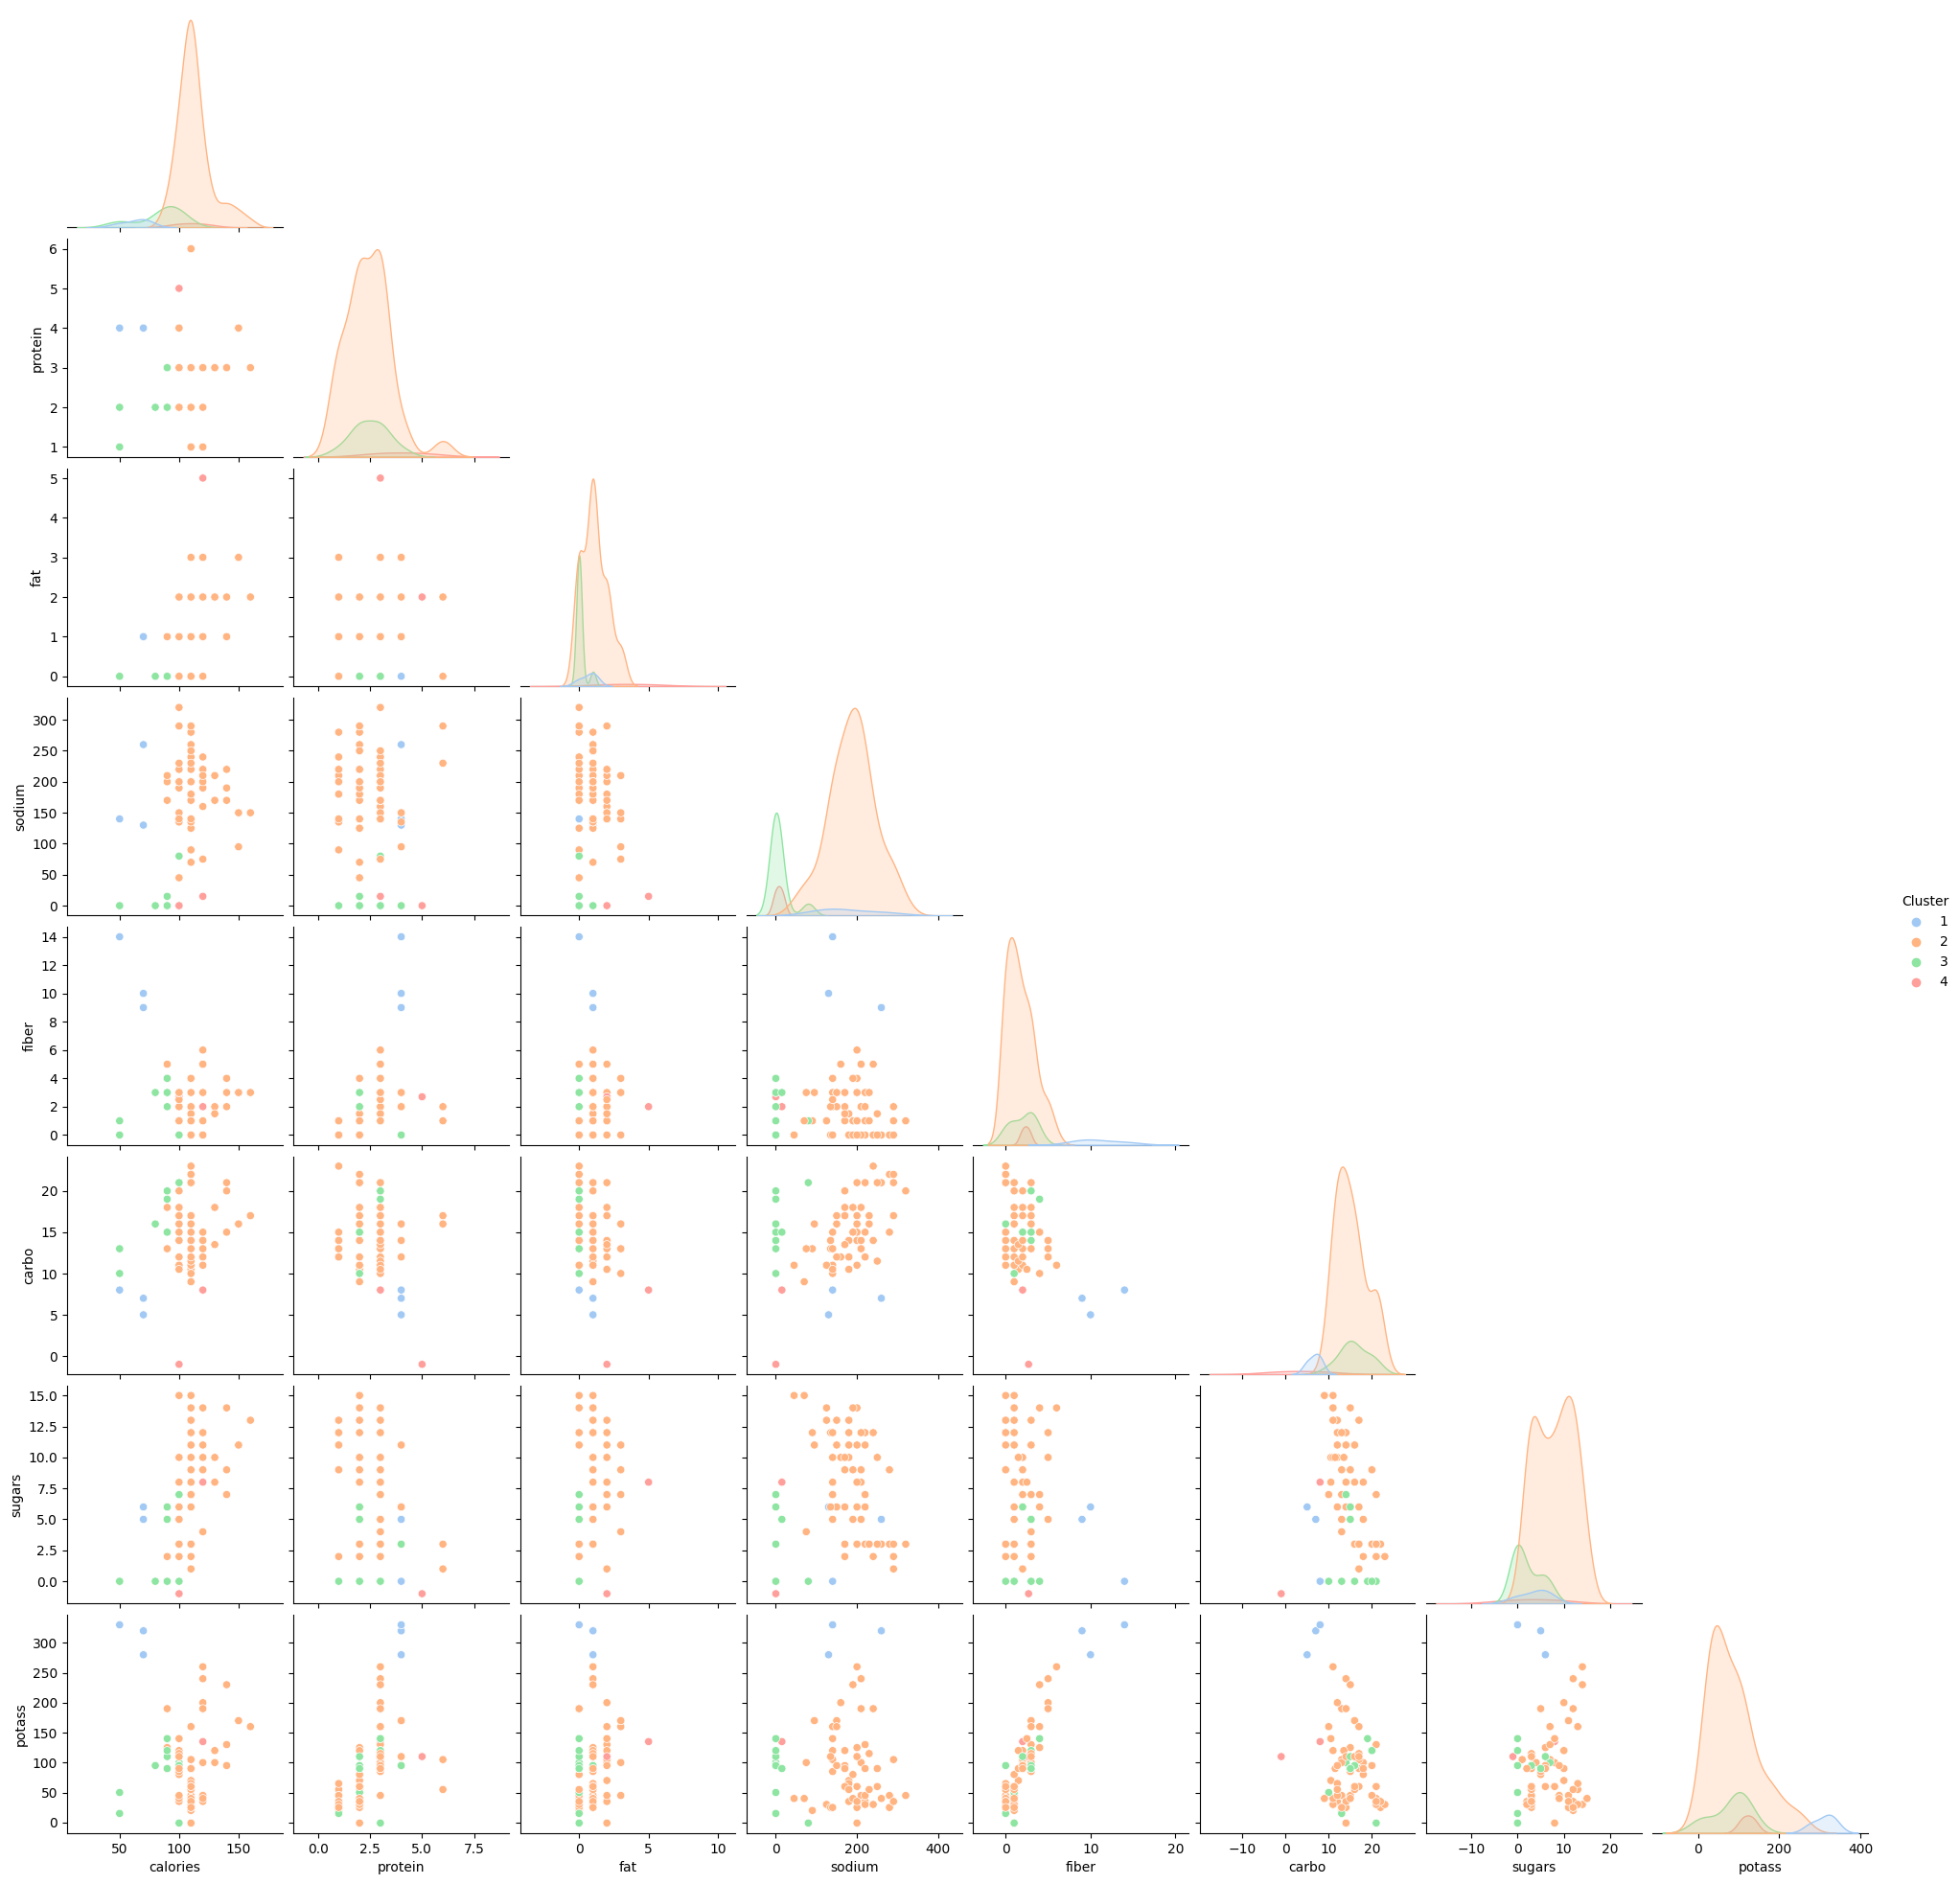

In [53]:
cereal_clust=pd.concat([cereal, pd.Series(clust, name='Cluster')], axis=1)
#customer_clust.head()

sns.pairplot(cereal_clust, hue='Cluster', corner=True, palette="pastel")

# Show the plot
plt.show()

**K-means clustering with k = 3**

In [54]:
km3 = KMeans(n_clusters=3)
km3.fit(cereal_sub)
cereal_k3=cereal_sub
cereal_k3["3Cluster"]=km3.labels_
#customer_k3.head()

<Figure size 1200x500 with 0 Axes>

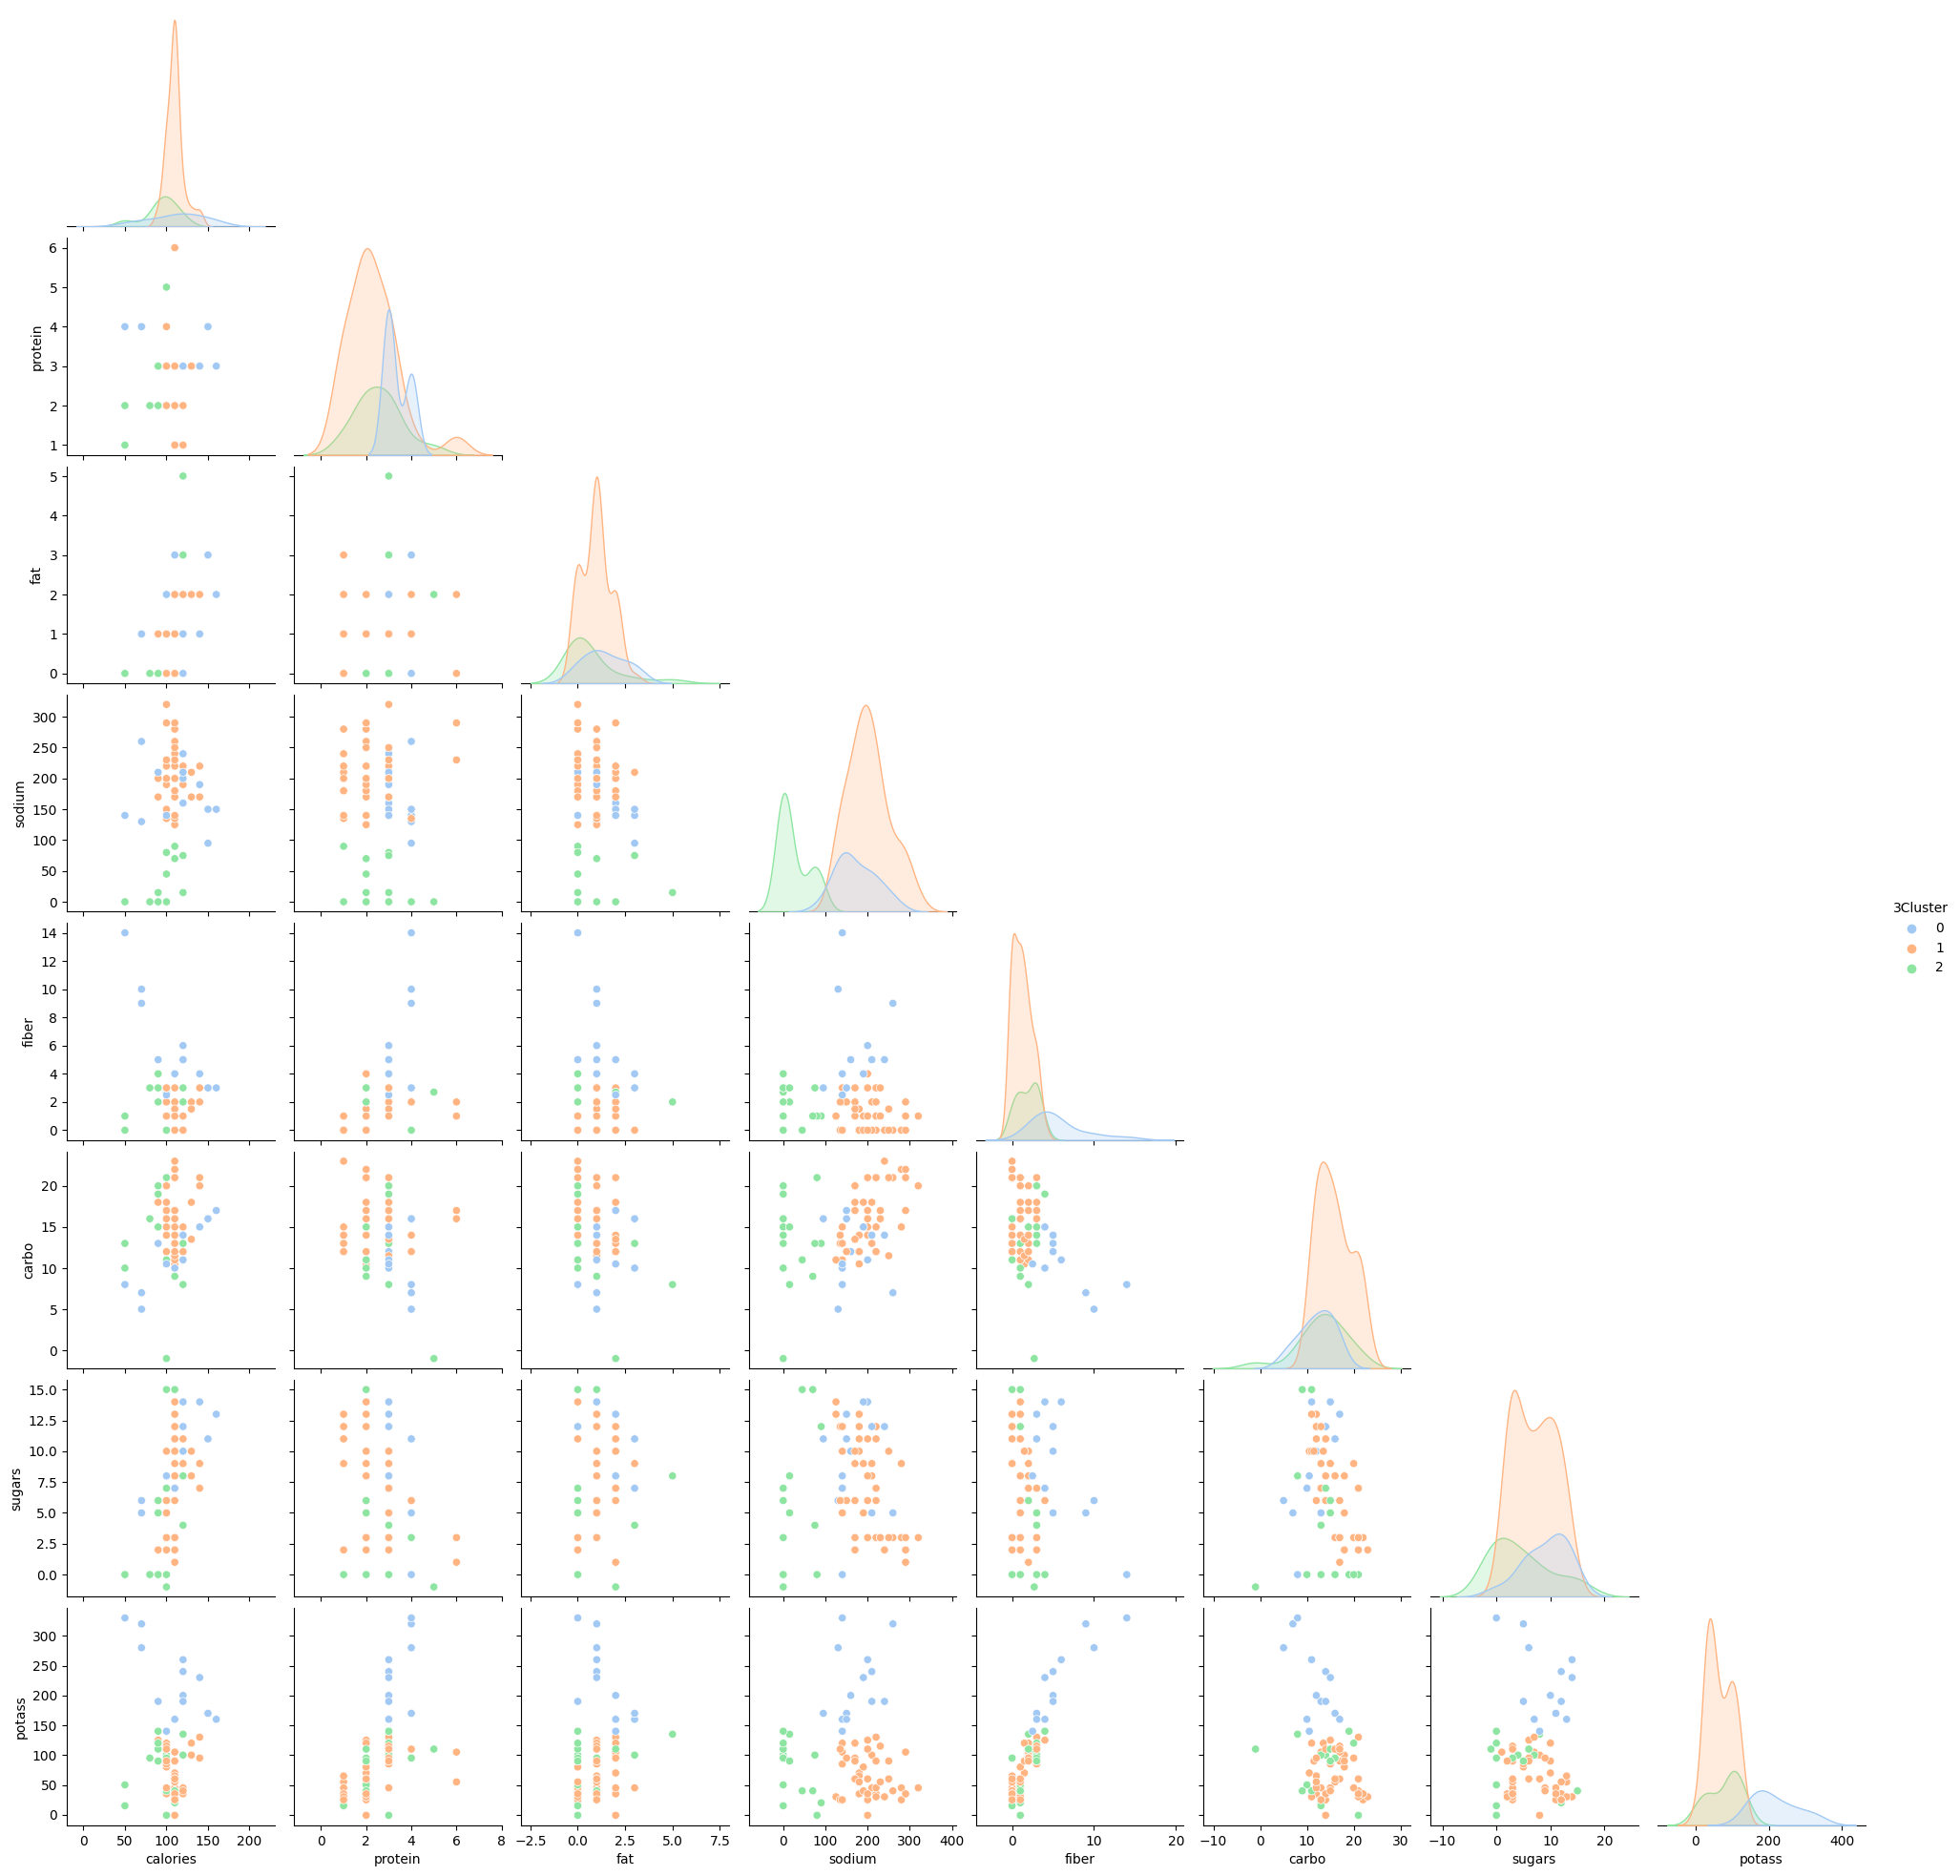

In [55]:

plt.figure(figsize=(12, 5))

sns.pairplot(cereal_k3, hue='3Cluster', corner=True, palette="pastel")

# Show the plot
plt.show()

**K-means clustering with k = 4**

In [56]:
km4 = KMeans(n_clusters=4)
km4.fit(cereal_sub)
cereal_k4=cereal_sub
cereal_k4["4Cluster"]=km4.labels_
#customer_k4.head()

<Figure size 1200x500 with 0 Axes>

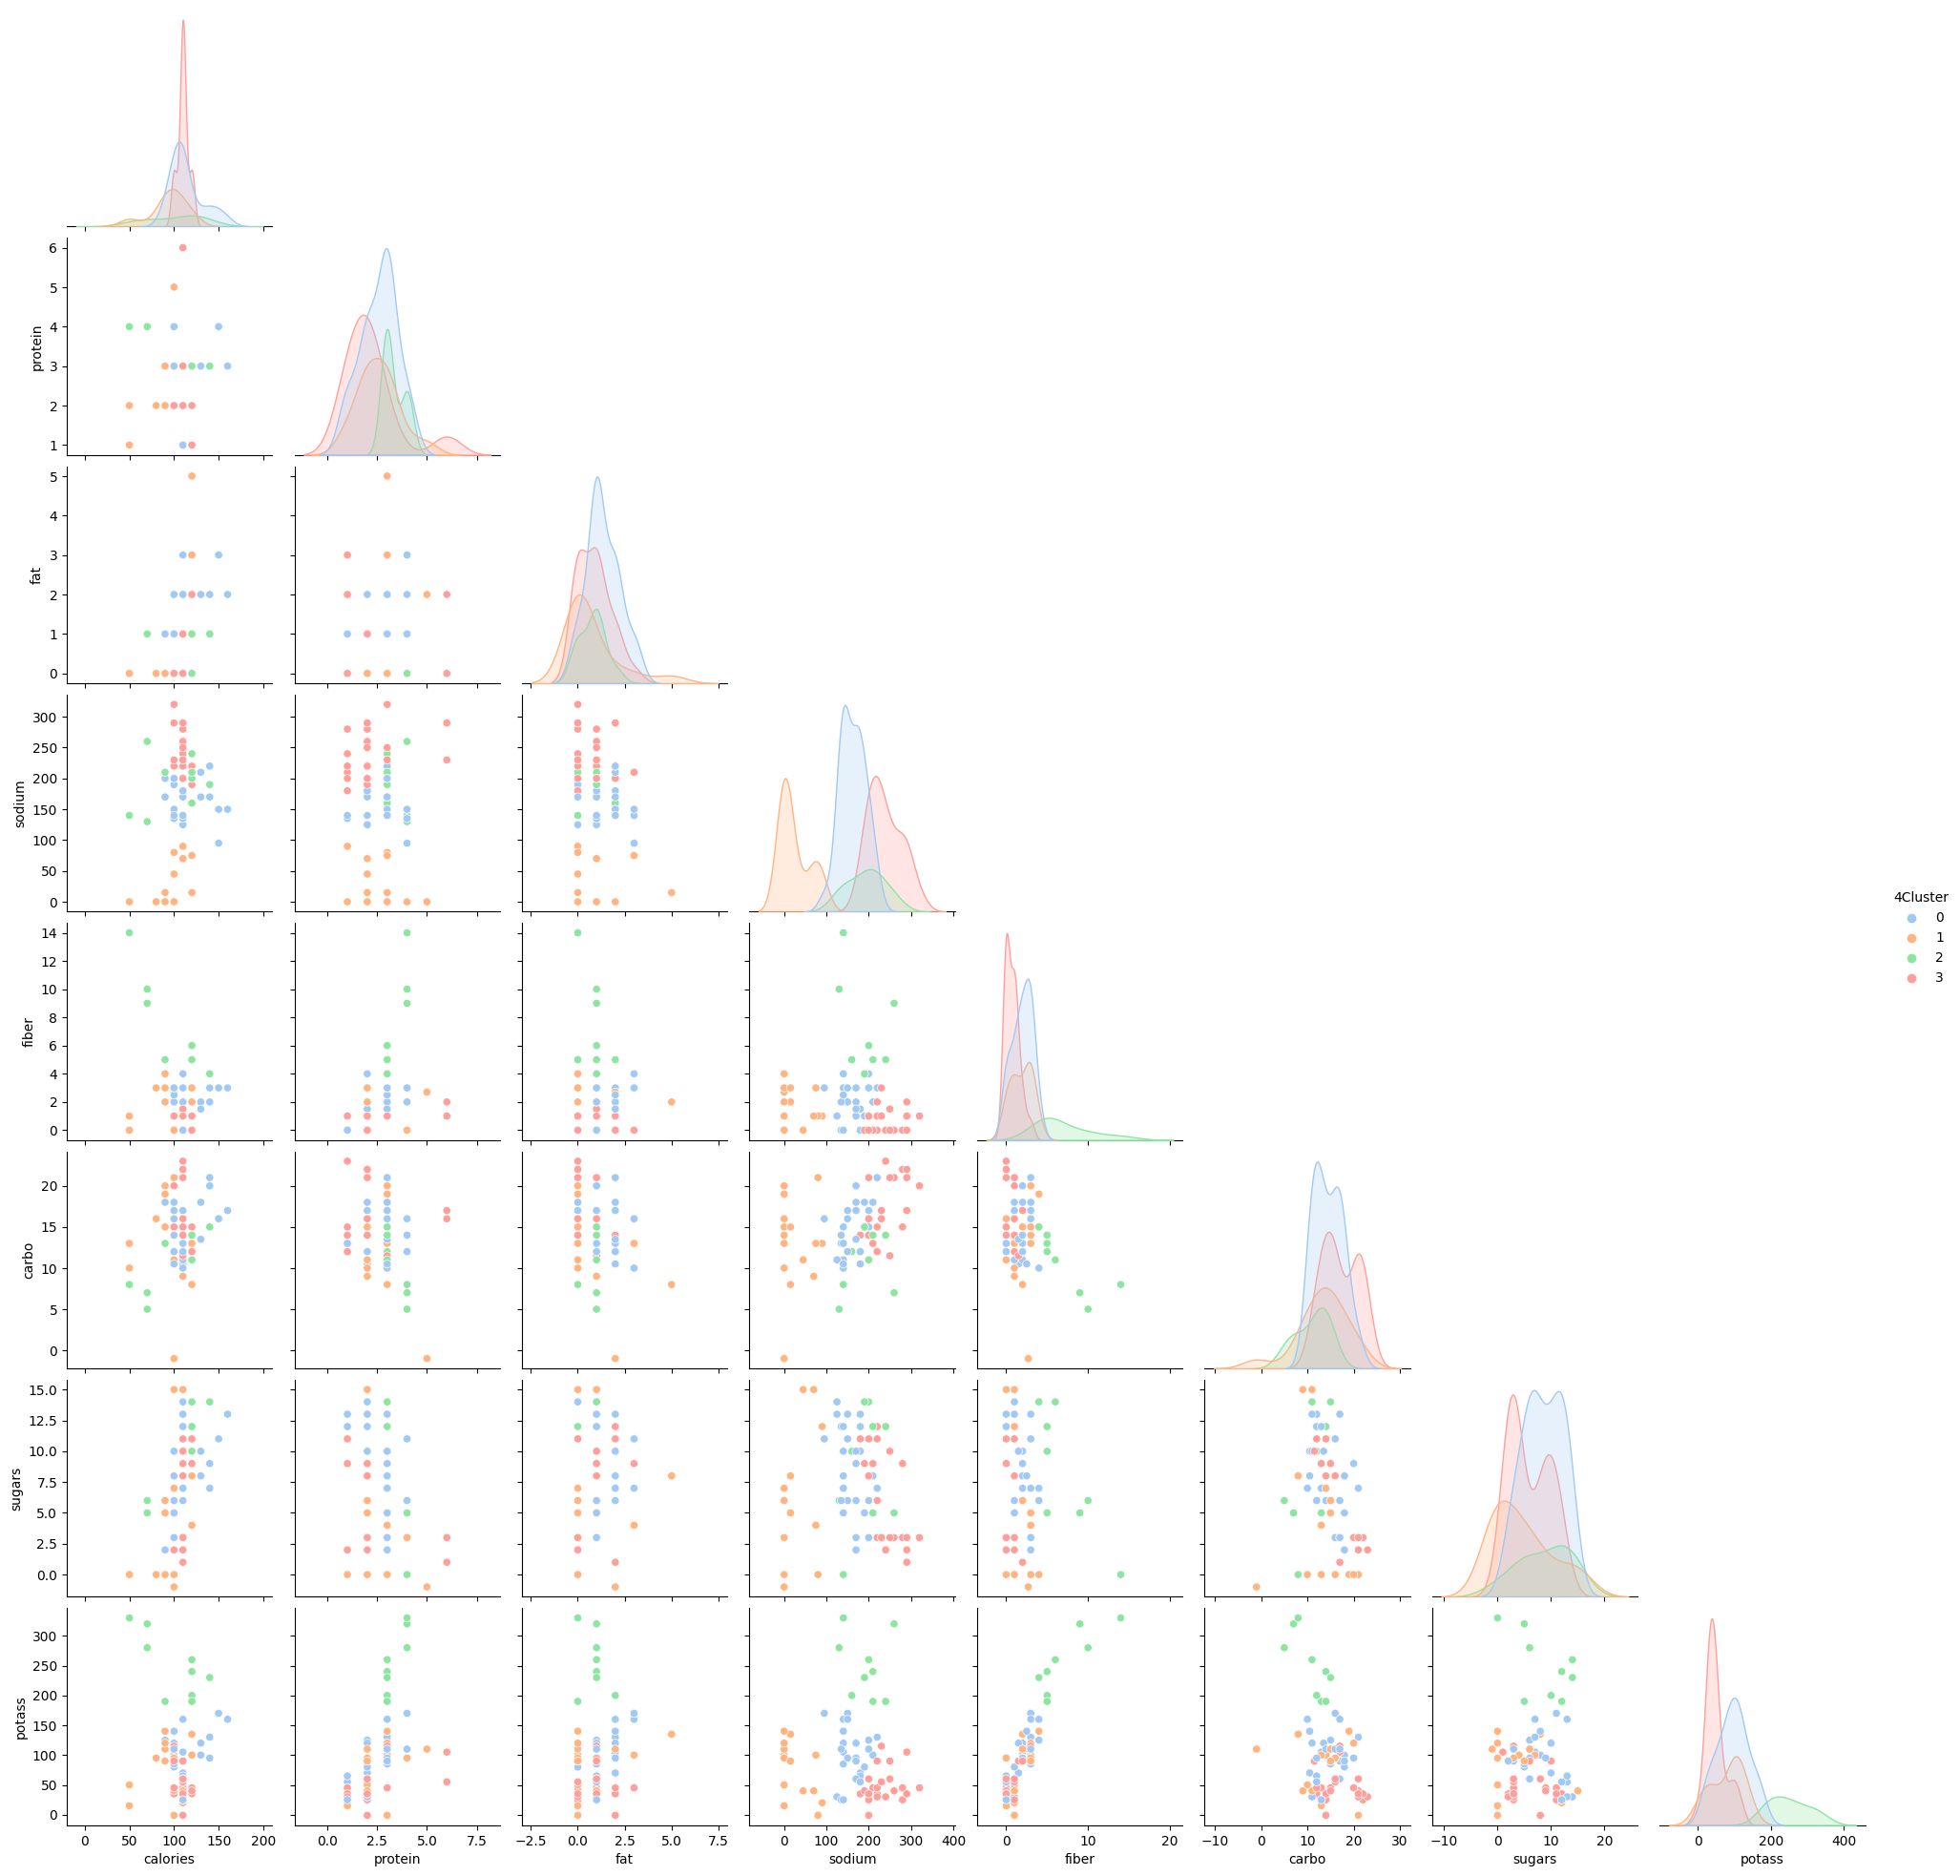

In [57]:
plt.figure(figsize=(12, 5))

data=cereal_k4.drop(["3Cluster"],axis=1)
sns.pairplot(data, hue='4Cluster', corner=True, palette="pastel")

# Show the plot
plt.show()

- When k=4, a seperation of the clusters can be seen when "Spending score" and "Annual Income" are considered, although there are very few overlappings.  



*   Cluster 0 : High Annual Income and High Spending score cluster
*   Cluster 1 : High Annual Income and Low Spending score cluster
*   Cluster 2 : Low Annual Income and Low Spending score cluster
*   Cluster 3 : Low Annual Income and High Spending score cluster



**K-means clustering with k = 5**

In [58]:
km5 = KMeans(n_clusters=5)
km5.fit(cereal_sub)
cereal_k5=cereal_sub
cereal_k5["5Cluster"]=km5.labels_
#cereal_k5.head()

<Figure size 1200x500 with 0 Axes>

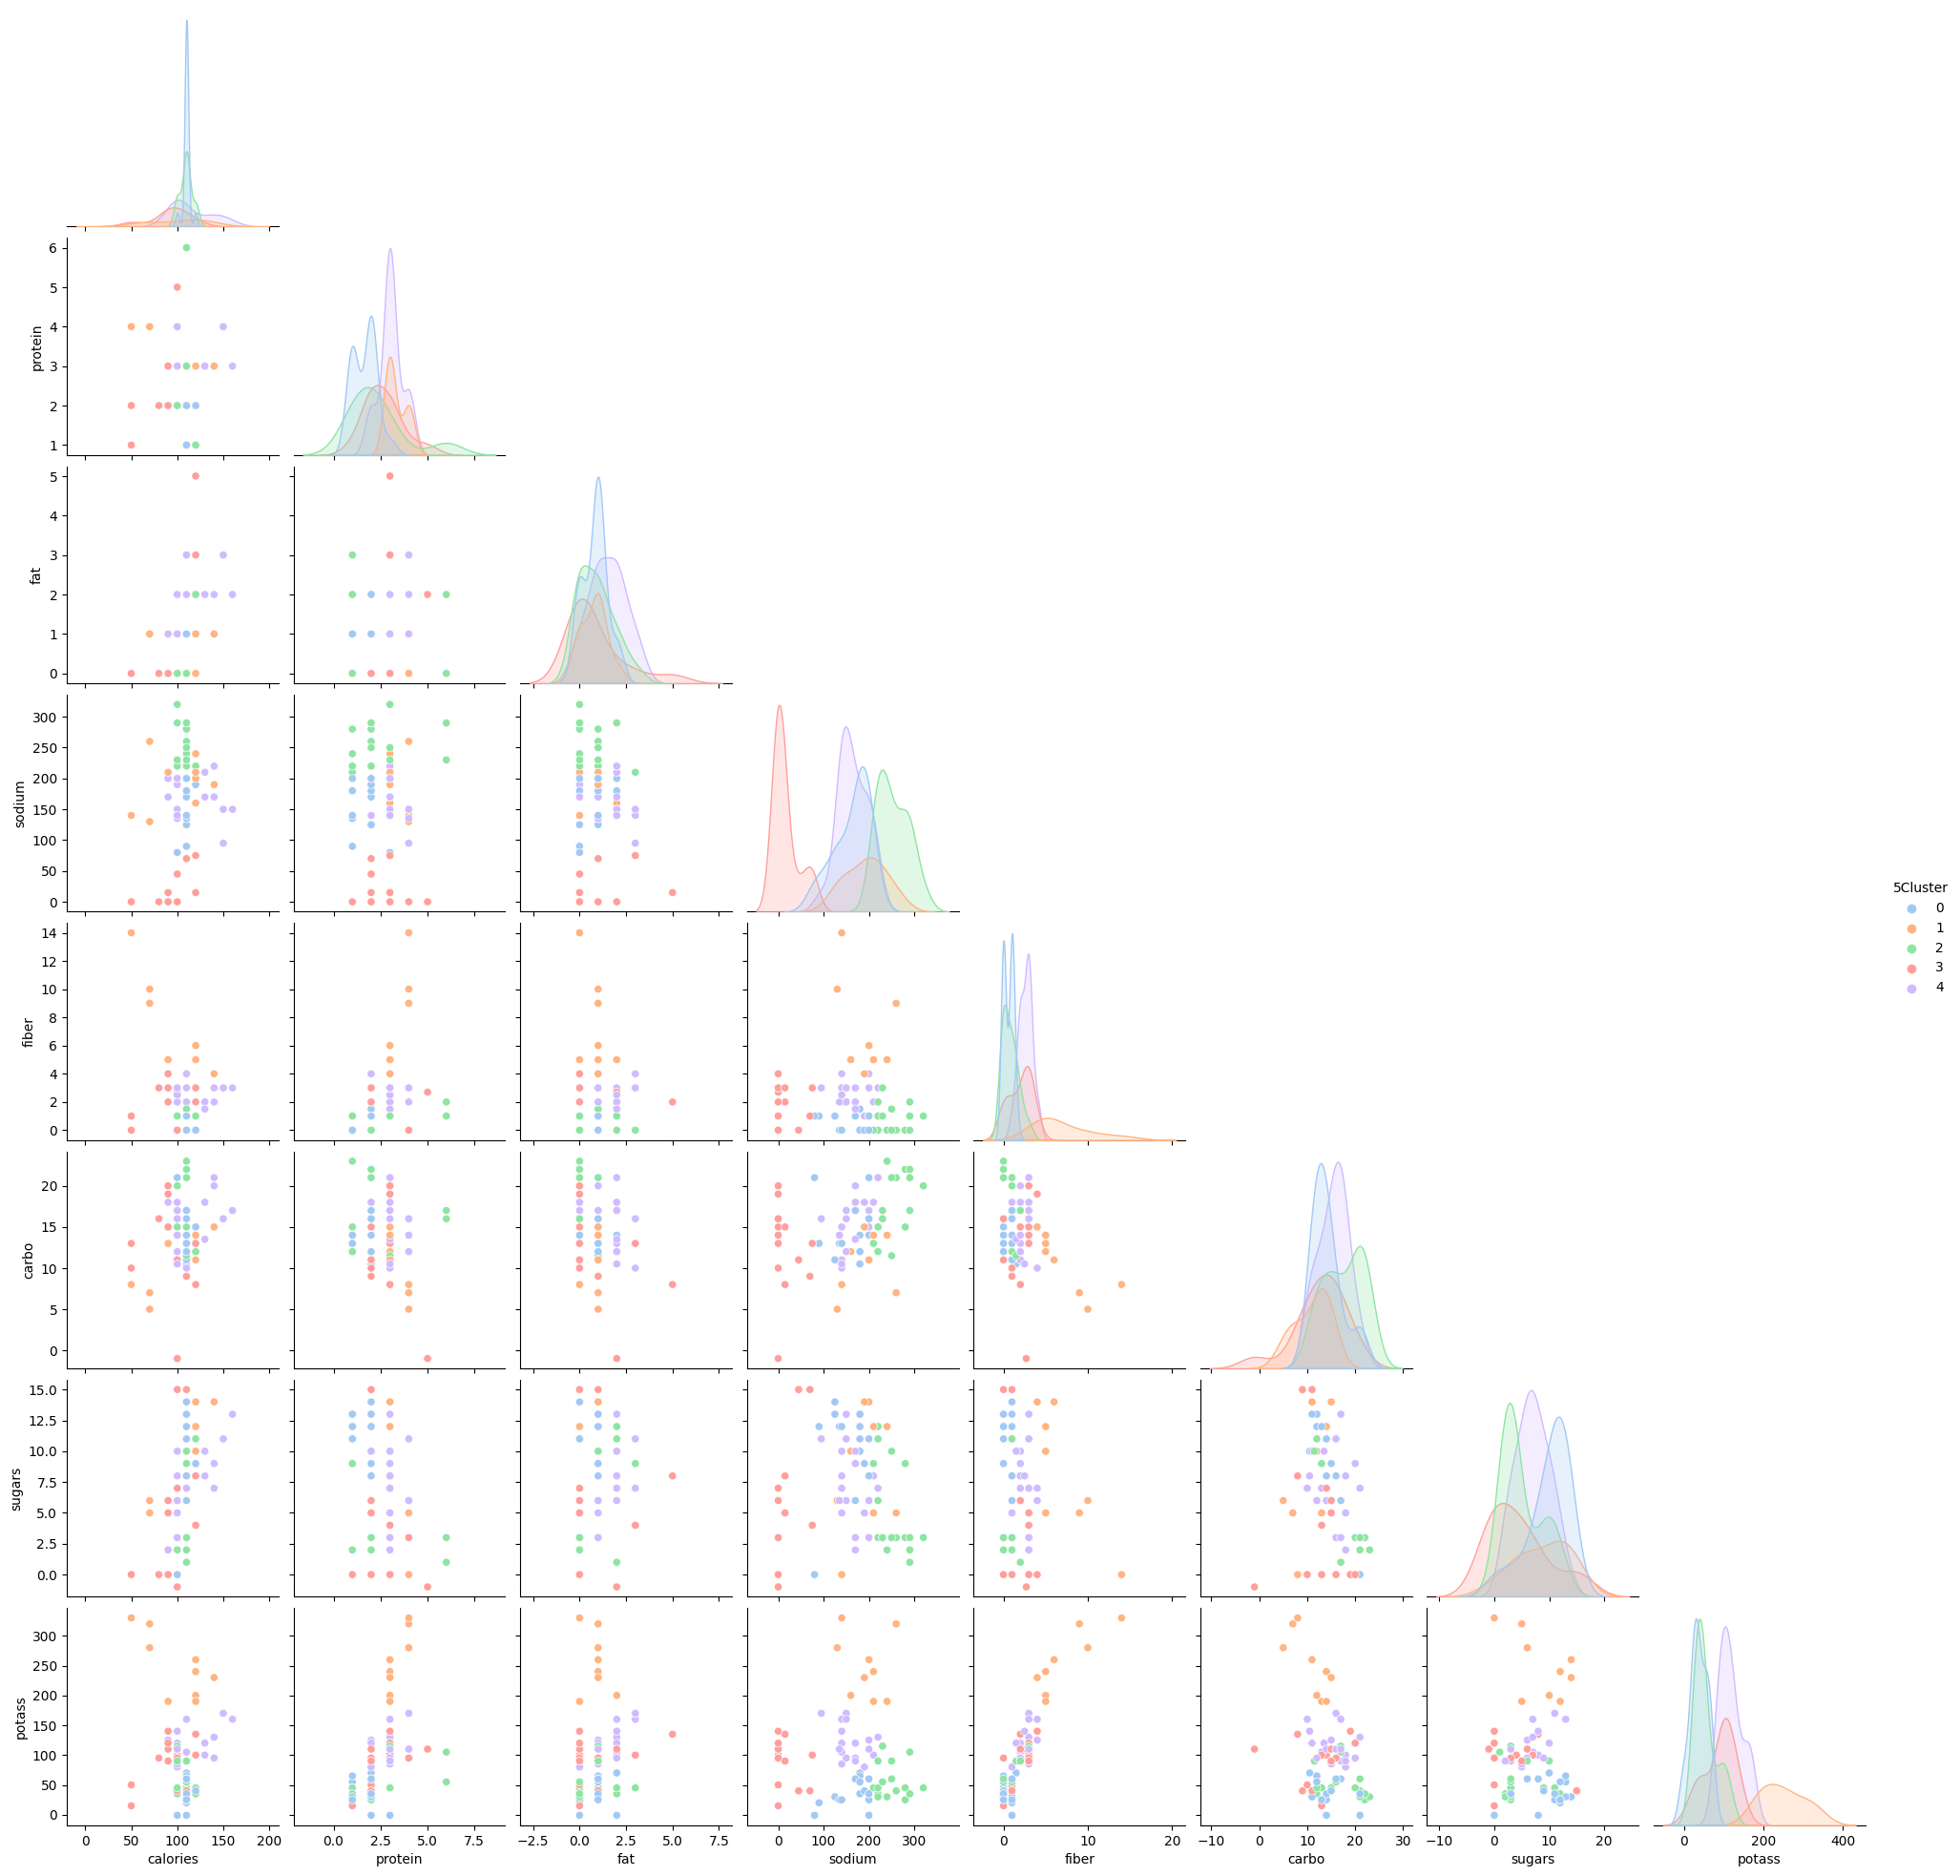

In [59]:
plt.figure(figsize=(12, 5))

data=cereal_k5.drop(["3Cluster","4Cluster"],axis=1)
sns.pairplot(data, hue='5Cluster', corner=True, palette="pastel")

# Show the plot
plt.show()

**Scree Plot**

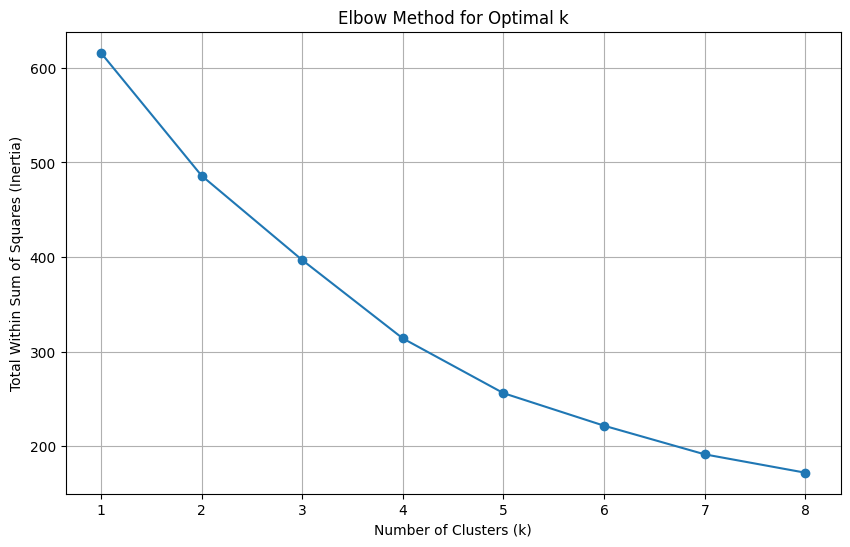

In [60]:
# Create a list to store the total within sum of squares (inertia) for different values of k (number of clusters)
inertias = []
k_range = range(1, 9)  # Change the range according to your preference, e.g., (1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cereal_sc)
    inertias.append(kmeans.inertia_)

# Plot the number of clusters vs. total within sum of squares
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Within Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

- The scree plot also shows that the optimal number of clusters is 4.
- If we compare the 2 methods Hierarchical clustering and K-means clustering, both methods seems to give good results for
this data. The classification seems to be difficult due to the presence of some extreme values.

